In [ ]:
#Dataset from https://www.kaggle.com/datasets/rajatraj0502/parental-leave-policies/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
data_dictionary = pd.read_csv("archive\data_dictionary.csv")
data_dictionary.head(7)

,Field,Description
0,Company,Company name
1,Industry,Company industry & sub-industry (Industry: Sub...
2,Paid Maternity Leave,Paid weeks off from work for mothers after the...
3,Unpaid Maternity Leave,Unpaid weeks off from work for mothers after t...
4,Paid Paternity Leave,Paid weeks off from work for fathers after the...
5,Unpaid Paternity Leave,Unpaid weeks off from work for fathers after t...
6,NaN,NOTE: This is user-reported data. Where users ...


In [3]:
parental_leave = pd.read_csv('archive\parental_leave.csv')
parental_leave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1601 non-null   object 
 1   Industry                1598 non-null   object 
 2   Paid Maternity Leave    1601 non-null   float64
 3   Unpaid Maternity Leave  1494 non-null   float64
 4   Paid Paternity Leave    289 non-null    float64
 5   Unpaid Paternity Leave  64 non-null     float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
dtypes: float64(8), object(2)
memory usage: 125.2+ KB


In [4]:
parental_leave.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], inplace=True)

In [5]:
parental_leave.groupby('Industry').nunique()

,Company,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
Industry,,,,,
Accounting Services,13,8,6,5,1
Advertising,50,18,13,2,1
Advertising: Market Research,3,2,3,0,0
Aerospace,8,5,5,2,0
Arts & Entertainment,7,5,4,3,1
...,...,...,...,...,...
Transportation: Rail,4,3,3,1,0
Transportation: Rental,3,2,3,0,0
Utilities,1,1,1,0,0


In [6]:
sampled_data = parental_leave.sample(100)

In [7]:
sampled_data.head()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
1538,Wilson Dow Group,Advertising,1.0,NaN,NaN,NaN
1546,Round Rock ISD,Educational Services: Management,0.0,NaN,NaN,NaN
42,Thryv,Technology: Software,0.0,3.0,0.0,0.0
929,Blue Cross and Blue Shield of Texas,Insurance: Health,6.0,0.0,NaN,NaN
366,The Larkin Company,Business Services: Other,12.0,12.0,NaN,NaN


<AxesSubplot:xlabel='Industry', ylabel='count'>

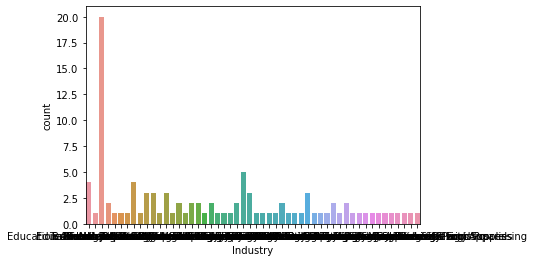

In [8]:
sns.countplot(x=sampled_data['Industry'])

In [9]:
parental_leave.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
count,1601.000000,1494.000000,289.000000,64.000000
mean,10.909119,6.628849,7.332180,7.734375
std,8.024514,9.274953,6.817591,6.831863
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,2.000000,2.000000
50%,11.000000,4.000000,6.000000,6.000000
75%,12.000000,10.000000,12.000000,12.000000
max,52.000000,52.000000,51.000000,29.000000


In [10]:
parental_leave.sort_values('Paid Maternity Leave', ascending=False).groupby('Industry').head(50)

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
1023,ASML,NaN,52.0,40.0,NaN,NaN
1543,Scentsy,Consumer Packaged Goods: Packaged Products,52.0,NaN,NaN,NaN
886,LeverX,Information Services: Technology,52.0,0.0,NaN,NaN
1076,Washburn Center For Children,Nonprofit: Civic & Social,52.0,2.0,NaN,NaN
1068,World Vision,Nonprofit: Charity,52.0,0.0,NaN,NaN
...,...,...,...,...,...,...
739,Children's Wisconsin,Healthcare: Hospitals & Clinics,0.0,12.0,NaN,NaN
1561,American Bridge Company,Industrial: Construction Company,0.0,NaN,NaN,NaN
1026,Bunge North America,Natural Resources: Agriculture and Food Proces...,0.0,6.0,NaN,NaN
1029,CHS Inc.,Natural Resources: Agrochemical,0.0,16.0,NaN,NaN


In [12]:
grouped_df = parental_leave.groupby('Industry')['Paid Maternity Leave'].mean()

In [13]:
threshold = grouped_df.quantile(0.75)

# Filter the DataFrame to get the top 25 percent
top_25_percent = grouped_df >= threshold
print(top_25_percent)

Industry
Accounting Services             False
Advertising                     False
Advertising: Market Research    False
Aerospace                       False
Arts & Entertainment            False
                                ...  
Transportation: Rail            False
Transportation: Rental          False
Utilities                       False
Wellness & Fitness              False
Wholesale                       False
Name: Paid Maternity Leave, Length: 185, dtype: bool


In [14]:
threshold = grouped_df.quantile(0.75)
top_25 = grouped_df[grouped_df >= threshold]
print(top_25)

Industry
Business Services: Human Resources               19.900000
Computer & Network Security                      13.000000
Computer Software                                12.000000
Conglomerate                                     15.050000
Consulting Services                              12.031915
Consumer Packaged Goods: Beverages               13.250000
Consumer Packaged Goods: Packaged Products       17.000000
Consumer Packaged Goods: Toys & Baby Products    12.000000
Cosmetics                                        13.500000
Educational Services: Other                      12.916667
Educational Services: Tutoring                   16.000000
Engineering                                      12.000000
Finance                                          14.000000
Finance: Asset Management                        12.666667
Finance: Credit & Fund Services                  16.000000
Finance: Credit Unions                           16.000000
Finance: Diversified                           

In [15]:
threshold = grouped_df.quantile(0.90)
top_10 = grouped_df[grouped_df >= threshold]
print(top_10)

Industry
Business Services: Human Resources            19.900000
Consumer Packaged Goods: Packaged Products    17.000000
Educational Services: Tutoring                16.000000
Finance: Credit & Fund Services               16.000000
Finance: Credit Unions                        16.000000
Government: County                            19.250000
Healthcare: Telemedicine                      30.000000
Information Services: Financial               16.571429
Natural Resources: Electric & Gas Utility     16.071429
Natural Resources: Metals & Mining            17.600000
Nonprofit: Charity                            17.250000
Nonprofit: Civic & Social                     15.625000
Nonprofit: Development                        16.000000
Nonprofit: Finance                            19.000000
Philanthropy                                  22.400000
Real Estate: Other                            17.000000
Technology                                    18.000000
Technology: Gaming                     

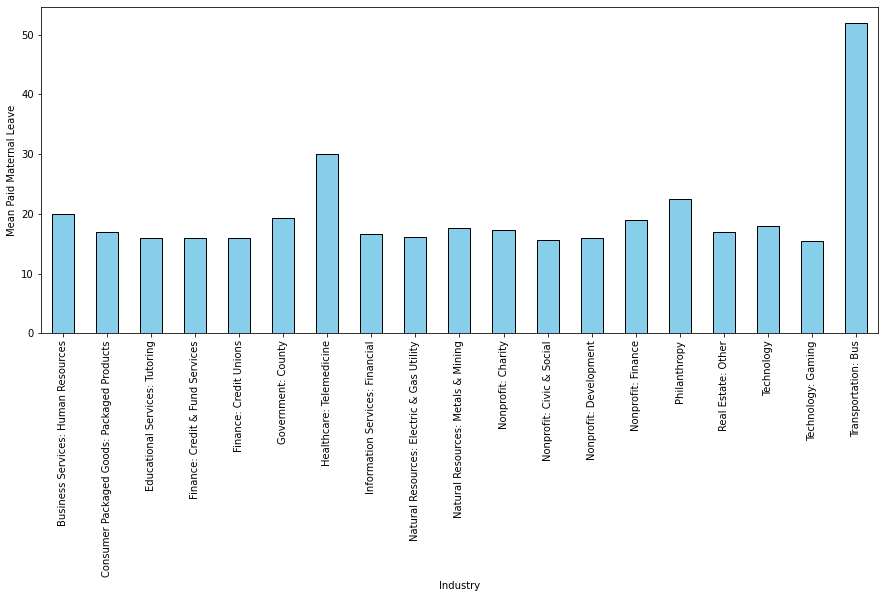

In [16]:
plt.figure(figsize=(15, 6))
top_10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Industry')
plt.ylabel('Mean Paid Maternal Leave')
plt.show()

In [17]:
grouped_companies = parental_leave.groupby('Company')['Paid Maternity Leave'].mean()
threshold = grouped_companies.quantile(0.99)
top_n = grouped_companies[grouped_companies >= threshold]
print(top_n)

Company
ASML                              52.0
American Income Life              52.0
Bitdefender                       52.0
Cloudworkers                      52.0
Dynatrace                         52.0
FlixBus                           52.0
Intact Financial Corporation      52.0
JHC Systems                       52.0
LeverX                            52.0
MTX Group Inc                     52.0
Netflix                           52.0
Rangle.io                         52.0
Reliance Industries, Ltd          52.0
Scentsy                           52.0
Spokane County                    52.0
University of British Columbia    52.0
Veritas Law                       52.0
Washburn Center For Children      52.0
WorkJam                           52.0
World Vision                      52.0
Name: Paid Maternity Leave, dtype: float64


In [24]:
software_companies = parental_leave[parental_leave['Industry'] == 'Technology: Software']
software_companies.shape

(160, 6)

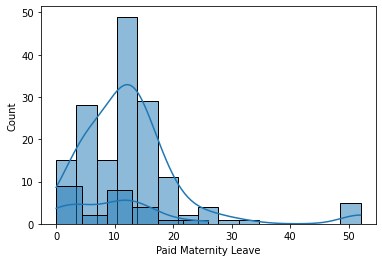

In [48]:

sns.histplot(data = software_companies, x = 'Paid Maternity Leave', kde = True)
sns.histplot(data = software_companies, x = 'Paid Paternity Leave', kde = True)

plt.show()

In [40]:
software_companies.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
count,160.000000,155.000000,25.000000,7.000000
mean,12.659375,5.945161,9.260000,12.857143
std,9.238519,10.458571,6.780978,7.289915
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,4.000000,12.000000
50%,12.000000,2.000000,10.500000,12.000000
75%,16.000000,8.000000,12.000000,15.000000
max,52.000000,52.000000,26.000000,24.000000


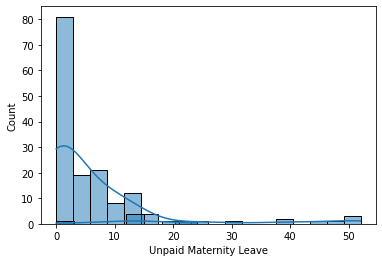

In [49]:
sns.histplot(data = software_companies, x = 'Unpaid Maternity Leave', kde = True)
sns.histplot(data = software_companies, x = 'Unpaid Paternity Leave', kde = True)

plt.show()